# 2. Análise Exploratória dos Dados

A partir dos dados extraídos da cobertura de vacinação do Brasil a análise tem como objetivo as seguintes hipóteses:
1. Existe diferença significativa entre a cobertura vacinal entre o Brasil, Nordeste, Estado do Piauí.
2. Existe alguma vacina em que a cobertura vacinal é maior no estado do Piauí do que a região Nordeste no ano de 2018.
3. Existe alguma vacina em que a cobertura vacinal é maior na região Nordeste do que no Brasil no ano de 2018.

## 2.1. Importando a base de Dados

In [1]:
# Importando os pacotes
import pandas as pd

In [2]:
df = pd.read_csv("../data/processed/coberturas_vacinais_por_ano_segundo_imuno_todas_regioes.csv",
                 sep = ";")
df.head()

,Imuno,variable,value,local
0,072 BCG,1994,99.20,Piaui
1,073 Hepatite B,1994,0.00,Piaui
2,074 Poliomielite,1994,53.33,Piaui
3,006 Febre Amarela,1994,0.01,Piaui
4,075 DTP,1994,65.65,Piaui


## 2.2. Hipótese 1: Existe diferença significativa entre a cobertura vacinal entre o Brasil, Nordeste, Estado do Piauí.

In [3]:
df_total = df.query('Imuno == "Total"')
df_total

,Imuno,variable,value,local
6,Total,1994,47.64,Piaui
14,Total,1995,46.32,Piaui
22,Total,1996,44.03,Piaui
30,Total,1997,42.93,Piaui
38,Total,1998,52.15,Piaui
...,...,...,...,...
886,Total,2015,85.61,Brasil
908,Total,2016,72.16,Brasil
931,Total,2017,76.70,Brasil
954,Total,2018,79.67,Brasil


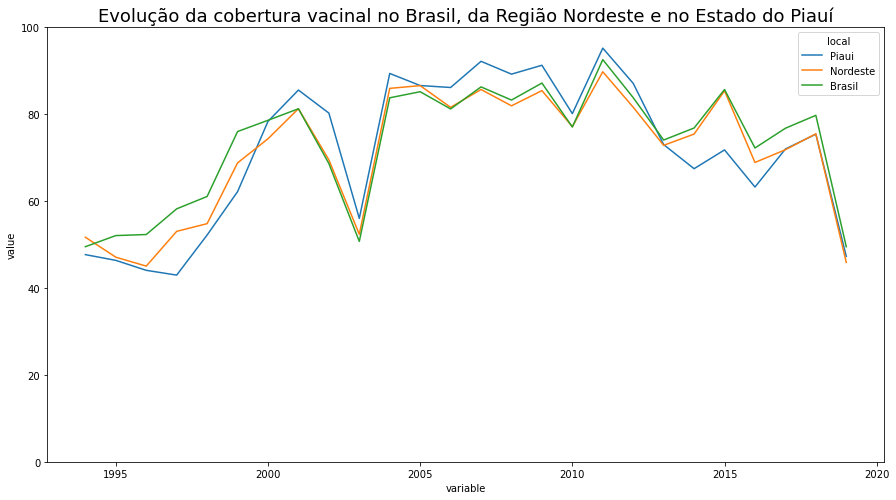

In [57]:
# Gerando o gráfico
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a paleta de cores com o dicionário de cada local
palette ={"Piaui": "C0", "Nordeste": "C1", "Brasil": "C2"}

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_total, x='variable', y='value', hue="local", palette = palette)
plt.title("Evolução da cobertura vacinal no Brasil, da Região Nordeste e no Estado do Piauí", fontsize= 18)
plt.ylim(0, 100)
plt.show()


In [5]:
df_total.query("local == 'Brasil'")[['variable', 'value']].T

,657,665,673,681,689,699,709,719,729,739,...,801,811,822,843,865,886,908,931,954,977
variable,1994.00,1995.00,1996.00,1997.00,1998.00,1999.00,2000.00,2001.00,2002.00,2003.00,...,2010.00,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.0,2018.00,2019.00
value,49.46,52.02,52.26,58.17,61.01,75.94,78.53,81.18,68.59,50.68,...,76.98,92.48,83.73,73.99,76.76,85.61,72.16,76.7,79.67,49.46


Até o ano de 2001 o resultado da cobertura vacinal geral foi significativamente maior no Brasil, do que na região Nordeste e no estado do Piauí. Nos períodos posteriores a cobertura vacinal é muito similiar em todos os locais. 

O Estado do Piauí apresentou desempenho maior entre os anos de 2005 e 2010.

Chama a atenção a evolução da cobertura vacinal de 1994 até o ano de 2001 que cresceu nos patamares de aproximadamente 49% para o patamar de 81%. Além disso, houve uma queda brusca na cobertura vacinal nos anos de 2002 e 2003.

## 2.3. Hipótese 2: Existe alguma vacina em que a cobertura vacinal é maior no estado do Piauí do que a região Nordeste.


In [43]:
local_hipotese_2 = ['Nordeste', 'Piaui']
df_hipoteste_2 = df.query('variable == 2018 & Imuno not in "Total" & local in @local_hipotese_2').sort_values(by = 'value', ascending = False)
df_hipoteste_2.head()

,Imuno,variable,value,local
605,072 BCG,2018,98.92,Nordeste
280,072 BCG,2018,97.47,Piaui
611,012 Pneumocócica,2018,95.81,Nordeste
619,021 Tríplice Viral D1,2018,93.46,Nordeste
609,073 Hepatite B,2018,92.42,Nordeste


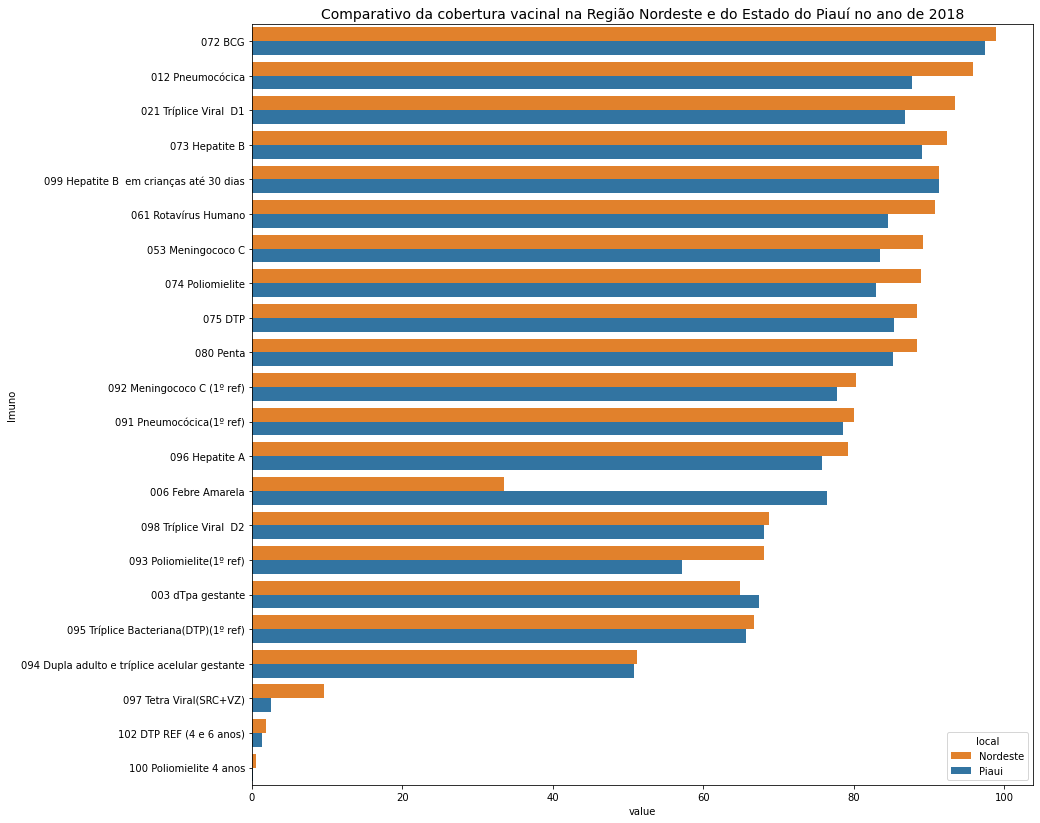

In [71]:
ax = plt.figure(figsize=(14,14))
ax = sns.barplot(x="value", y="Imuno", hue="local",
                 data=df_hipoteste_2, palette = palette)
ax= plt.title("Comparativo da cobertura vacinal na Região Nordeste e do Estado do Piauí no ano de 2018", fontsize= 14)

Considerando a hipótese 2, somente as vacinas: 006 Febre Amarela e 003 dTpa gestante tem valores superiores no estado do Piaui do que na região nordeste. Destaca-se também o valor similar da cobertura 099 Hepatite B em crianças até 30 dias nos locais analisados. 

## 2.3. Hipótese 3: Existe alguma vacina em que a cobertura vacinal é maior na região Nordeste do que no Brasil.


In [46]:
local_hipotese_3 = ['Nordeste', 'Brasil']
df_hipoteste_3 = df.query('variable == 2018 & Imuno not in "Total" & local in @local_hipotese_3').sort_values(by = 'value', ascending = False)
df_hipoteste_3.head()

,Imuno,variable,value,local
605,072 BCG,2018,98.92,Nordeste
932,072 BCG,2018,97.72,Brasil
611,012 Pneumocócica,2018,95.81,Nordeste
619,021 Tríplice Viral D1,2018,93.46,Nordeste
938,012 Pneumocócica,2018,93.43,Brasil


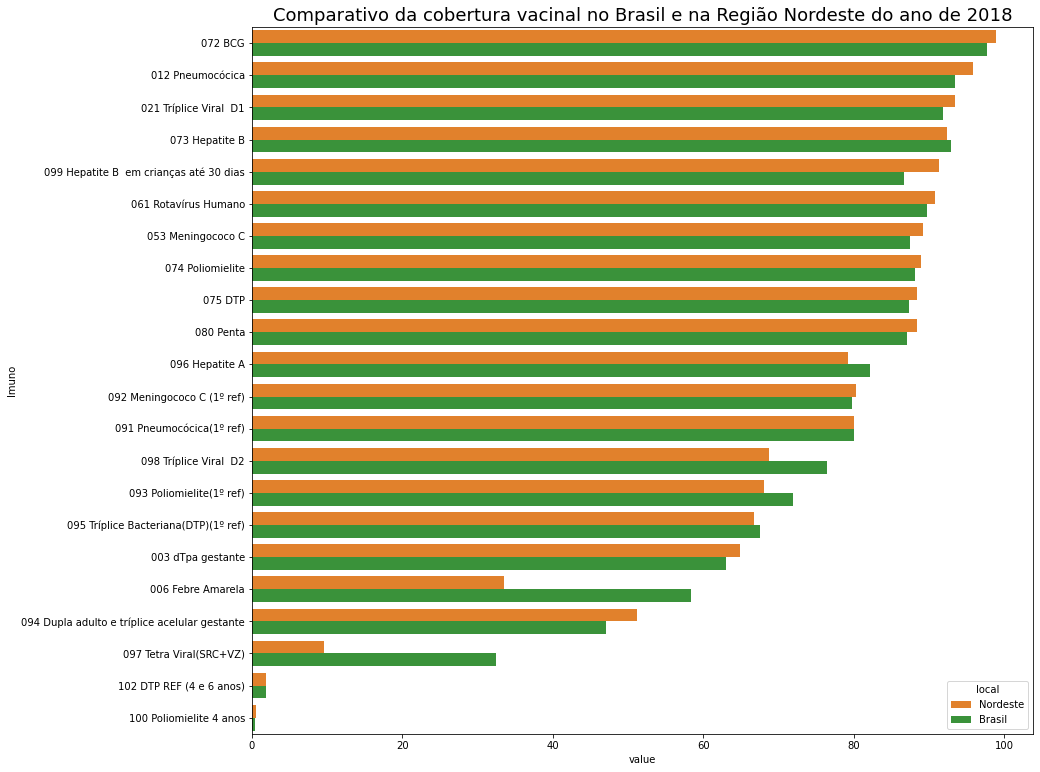

In [61]:
plt.figure(figsize=(14,13))
ax = sns.barplot(x="value", y="Imuno", hue="local",
                 data=df_hipoteste_3, palette = palette)
plt.title("Comparativo da cobertura vacinal no Brasil e na Região Nordeste do ano de 2018", fontsize= 18)
fig = ax.get_figure()

Considerando a hipótese 3, as vacinas: 073 Hepatite B e 096 Hepatite A, 098 Tríplice Viral D2, 093 Poliomelite, 095 Tríplice Bacteriana, 006 Febre Amarela e 097 Tetra Viral tem valores superiores na Região Nordeste do que no Brasil. 